# Quran Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

In [2]:
quran_english = pd.read_csv('en.yusufali.csv')
quran_english

,Surah,Ayah,Text
0,1,1,"In the name of Allah, Most Gracious, Most Merc..."
1,1,2,"Praise be to Allah, the Cherisher and Sustaine..."
2,1,3,"Most Gracious, Most Merciful;"
3,1,4,Master of the Day of Judgment.
4,1,5,"Thee do we worship, and Thine aid we seek."
...,...,...,...
6231,114,2,"The King (or Ruler) of Mankind,"
6232,114,3,"The god (or judge) of Mankind,-"
6233,114,4,"From the mischief of the Whisperer (of Evil), ..."
6234,114,5,(The same) who whispers into the hearts of Man...


In [3]:
quran_english.shape

(6236, 3)

### 1. Quran has 6236 ayat excluding Bismillah. If we include Bismillah it becomes 6248 ayat.
### 2. Quran has a total of 114 chapters which is called surah.

In [4]:
quran_english[quran_english['Text'].str.contains('In the name of Allah, Most Gracious, Most Merciful')]

,Surah,Ayah,Text
0,1,1,"In the name of Allah, Most Gracious, Most Merc..."
3188,27,30,"""It is from Solomon, and is (as follows): 'In ..."


#### Bismillah al-rehman al-raheem means In the name of Allah, Most Gracious, Most Merciful.
#### In surah 27, verse 30 contains Bismillah

In [5]:
quran_english.isna().sum()

Surah    0
Ayah     0
Text     0
dtype: int64

In [6]:
quran_english.duplicated().sum()

0

In [7]:
surah_names = pd.read_csv('surah_names_english.csv',names=['Surah','Surah Name'])

In [8]:
surah_names

,Surah,Surah Name
0,1,Al-Fatihah (the Opening)
1,2,Al-Baqarah (the Cow)
2,3,Aali Imran (the Family of Imran)
3,4,An-Nisa’ (the Women)
4,5,Al-Ma’idah (the Table)
...,...,...
109,110,An-Nasr (the Help)
110,111,Al-Masad (the Palm Fiber)
111,112,Al-Ikhlas (the Sincerity)
112,113,Al-Falaq (the Daybreak)


In [9]:
quran_english_with_surah = quran_english.merge(surah_names,on='Surah')

In [10]:
quran_english_with_surah.index=np.arange(1,6236+1)
quran_english_with_surah

,Surah,Ayah,Text,Surah Name
1,1,1,"In the name of Allah, Most Gracious, Most Merc...",Al-Fatihah (the Opening)
2,1,2,"Praise be to Allah, the Cherisher and Sustaine...",Al-Fatihah (the Opening)
3,1,3,"Most Gracious, Most Merciful;",Al-Fatihah (the Opening)
4,1,4,Master of the Day of Judgment.,Al-Fatihah (the Opening)
5,1,5,"Thee do we worship, and Thine aid we seek.",Al-Fatihah (the Opening)
...,...,...,...,...
6232,114,2,"The King (or Ruler) of Mankind,",An-Nas (Mankind)
6233,114,3,"The god (or judge) of Mankind,-",An-Nas (Mankind)
6234,114,4,"From the mischief of the Whisperer (of Evil), ...",An-Nas (Mankind)
6235,114,5,(The same) who whispers into the hearts of Man...,An-Nas (Mankind)


In [11]:
quran_english_with_surah['Surah Name'].value_counts()

Surah Name
Al-Baqarah (the Cow)                   286
Ash-Shu’ara’ (the Poets)               227
Al-A’raf (the Heights)                 206
Aali Imran (the Family of Imran)       200
As-Saffah (Those Ranges in Ranks)      182
                                      ... 
Quraish (Quraish)                        4
Al-Ikhlas (the Sincerity)                4
Al-‘Asr (the Time)                       3
Al-Kauthar (the River of Abundance)      3
An-Nasr (the Help)                       3
Name: count, Length: 114, dtype: int64

In [12]:
surah_1to39 = quran_english_with_surah[quran_english_with_surah['Surah']<40]
surah_40to79 = quran_english_with_surah[(quran_english_with_surah['Surah']>39) & (quran_english_with_surah['Surah']<79) ]
surah_80to114 = quran_english_with_surah[quran_english_with_surah['Surah']>79 ]

In [13]:
def countplot(df,y_axis,title):
    plt.figure(figsize=(6,10))
    sns.set_style('darkgrid')
    plt.title(title,fontdict={'fontsize':20,'color':'maroon'})
    ax = sns.countplot(data=df,y=y_axis,palette='viridis')
    for x in ax.containers:
        ax.bar_label(x,padding=2)
    plt.show()



C:\Users\ARMS\AppData\Local\Temp\ipykernel_8256\3884324053.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df,y=y_axis,palette='viridis')


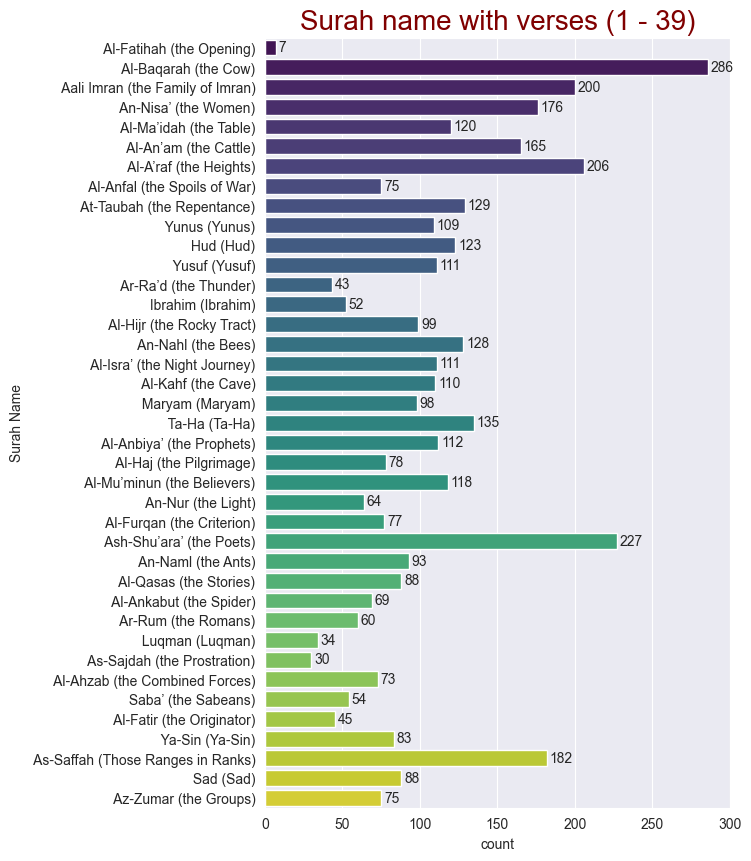

In [14]:
countplot(surah_1to39,'Surah Name','Surah name with verses (1 - 39)')

C:\Users\ARMS\AppData\Local\Temp\ipykernel_8256\3884324053.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df,y=y_axis,palette='viridis')


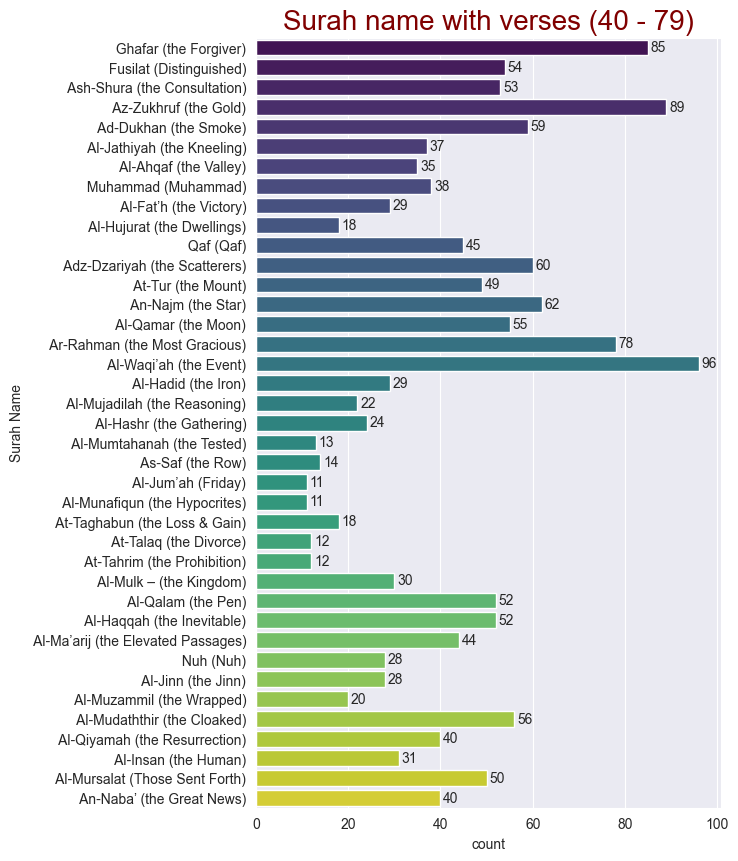

In [15]:
countplot(surah_40to79,'Surah Name','Surah name with verses (40 - 79)')

C:\Users\ARMS\AppData\Local\Temp\ipykernel_8256\3884324053.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df,y=y_axis,palette='viridis')


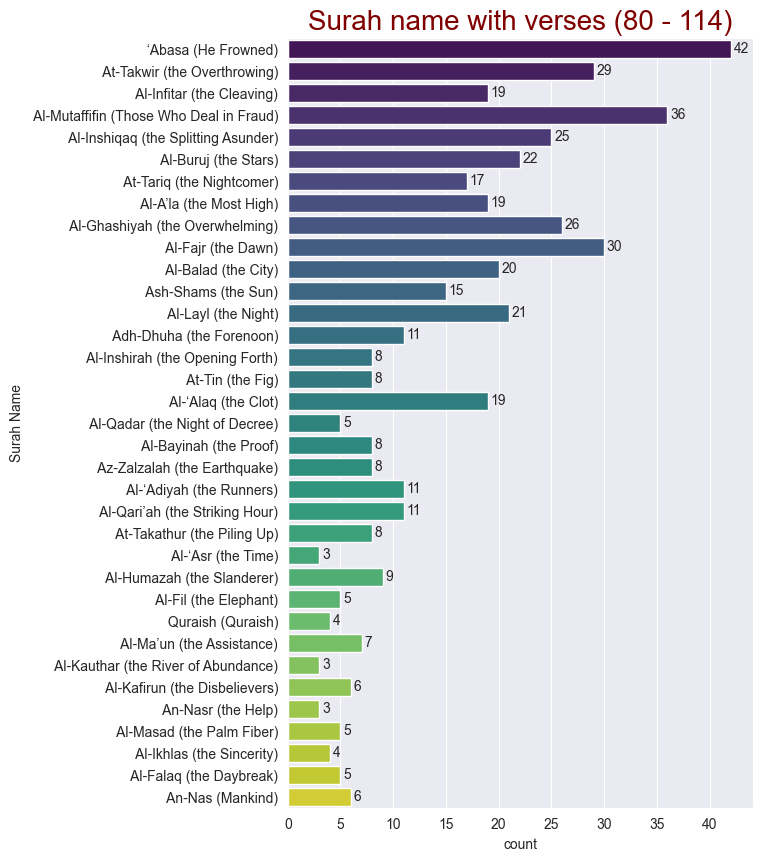

In [16]:
countplot(surah_80to114,'Surah Name','Surah name with verses (80 - 114)')

#### Surah Baqrah is the longest Surah in Quran.
#### Al-Asr, Al-Kauthar, An-Nasr are smallest Surah's in Quran

In [ ]:
quran_english_with_surah

,Surah,Ayah,Text,Surah Name
1,1,1,"In the name of Allah, Most Gracious, Most Merc...",Al-Fatihah (the Opening)
2,1,2,"Praise be to Allah, the Cherisher and Sustaine...",Al-Fatihah (the Opening)
3,1,3,"Most Gracious, Most Merciful;",Al-Fatihah (the Opening)
4,1,4,Master of the Day of Judgment.,Al-Fatihah (the Opening)
5,1,5,"Thee do we worship, and Thine aid we seek.",Al-Fatihah (the Opening)
...,...,...,...,...
6232,114,2,"The King (or Ruler) of Mankind,",An-Nas (Mankind)
6233,114,3,"The god (or judge) of Mankind,-",An-Nas (Mankind)
6234,114,4,"From the mischief of the Whisperer (of Evil), ...",An-Nas (Mankind)
6235,114,5,(The same) who whispers into the hearts of Man...,An-Nas (Mankind)


In [ ]:

prophet_names = [ "Isma'il", 'Elisha', 'Zul-Kifl', 'Jesus', 'Moses', "Shu'aib", 'Jacob', 'Lut',
                 'Joseph', 'Isaac', 'Job', 'Aaron', 'Abraham', 'Noah', 'Adam', 'Hud', 'Solomon', 
                 'David', 'Zakariya', 'Yahya', 'Elias', 'Jonah', 'Idris', 'Salih', 'Muhammad']


In [ ]:
prophet_freq = {}
for prophet in prophet_names:
    count = quran_english_with_surah['Text'].str.contains(prophet).sum()
    prophet_freq[prophet]=count

In [ ]:
for prophet,count in prophet_freq.items():
    print(f'{prophet} is mentioned {count} times')

Isma'il is mentioned 12 times
Elisha is mentioned 2 times
Zul-Kifl is mentioned 1 times
Jesus is mentioned 28 times
Moses is mentioned 167 times
Shu'aib is mentioned 11 times
Jacob is mentioned 19 times
Lut is mentioned 28 times
Joseph is mentioned 34 times
Isaac is mentioned 16 times
Job is mentioned 4 times
Aaron is mentioned 24 times
Abraham is mentioned 69 times
Noah is mentioned 47 times
Adam is mentioned 25 times
Hud is mentioned 8 times
Solomon is mentioned 18 times
David is mentioned 16 times
Zakariya is mentioned 8 times
Yahya is mentioned 4 times
Elias is mentioned 3 times
Jonah is mentioned 3 times
Idris is mentioned 2 times
Salih is mentioned 11 times
Muhammad is mentioned 4 times


In [ ]:
prophet_names_df = pd.DataFrame({'Name':list(prophet_freq.keys()),'Frequency':list(prophet_freq.values())})
prophet_names_df.sort_values('Frequency',ascending=False,inplace=True)

C:\Users\ARMS\AppData\Local\Temp\ipykernel_4648\441187607.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=prophet_names_df,x='Name',y='Frequency',palette='husl')


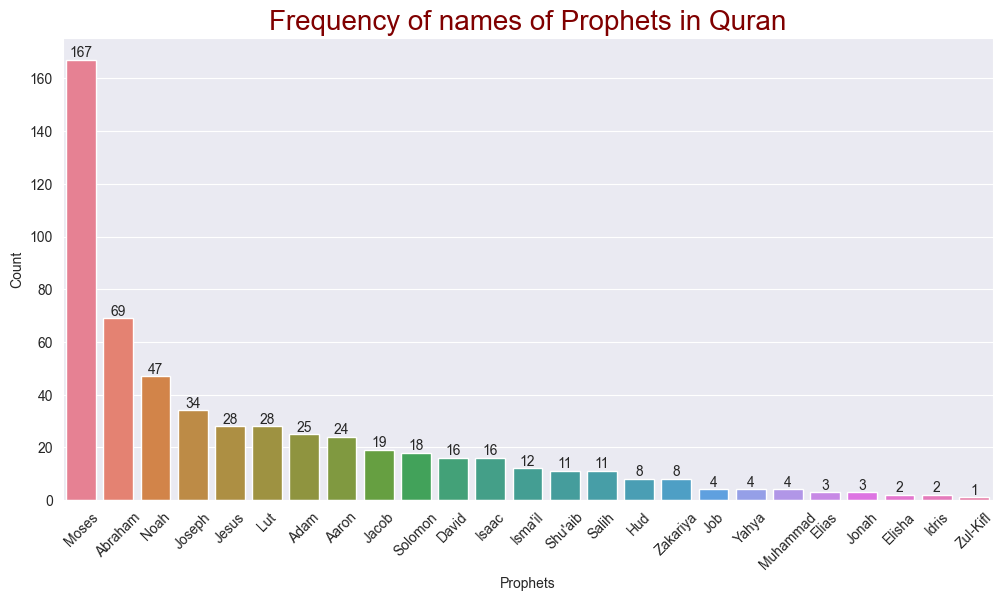

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Frequency of names of Prophets in Quran',fontdict={'fontsize':20,'color':'maroon'})
plt.xlabel('Prophets')
plt.ylabel('Count')
ax = sns.barplot(data=prophet_names_df,x='Name',y='Frequency',palette='husl')
plt.xticks(rotation=45)
for x in ax.containers:
    ax.bar_label(x)
plt.show()

#### Moses (Musa A.S) is mentioned 167 times in Quran, followed by Abraham, Noah, Joseph (Yusuf A.S).
#### The frequencies may vary from translation to translation of different languages and Mufasirs.

In [ ]:
terms_list = [ 'prayer', 'charity', 'justice', 'peace', 'patience', 'world', 'heaven', 'forgive', 'wisdom', 'hereafter']
terms_freq = {}
for terms in terms_list:
    count = quran_english_with_surah['Text'].str.contains(terms).sum()
    terms_freq[terms]=count


In [ ]:
for terms,count in terms_freq.items():
    print(f'{terms} is mentioned {count} times')

prayer is mentioned 92 times
charity is mentioned 46 times
justice is mentioned 51 times
peace is mentioned 27 times
patience is mentioned 45 times
world is mentioned 97 times
heaven is mentioned 238 times
forgive is mentioned 119 times
wisdom is mentioned 43 times
hereafter is mentioned 22 times


In [ ]:
terms_names_df = pd.DataFrame({'Terms':list(terms_freq.keys()),'Frequency':list(terms_freq.values())})
# terms_names_df.sort_values('Frequency',ascending=False,inplace=True)

C:\Users\ARMS\AppData\Local\Temp\ipykernel_4648\4248905584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=terms_names_df,x='Terms',y='Frequency',palette='husl')


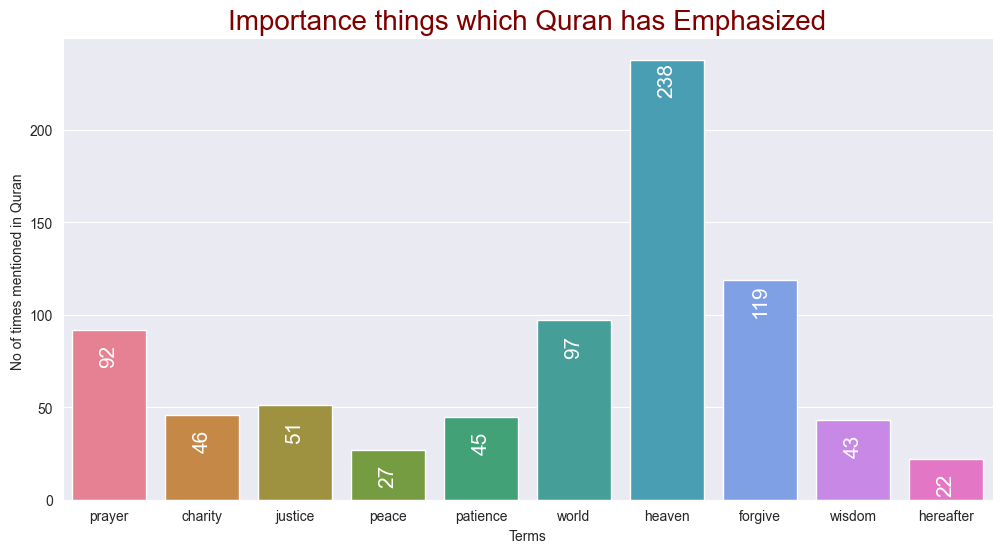

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Importance things which Quran has Emphasized',fontdict={'fontsize':20,'color':'maroon'})
plt.xlabel('Terms')
plt.ylabel('No of times mentioned in Quran ')
ax = sns.barplot(data=terms_names_df,x='Terms',y='Frequency',palette='husl')

for x in ax.containers:
    ax.bar_label(x,size=15,padding=-27,color='white',rotation=90)
plt.show()

#### Quran has emphasized on the topics which are necessary for the betterment of the society and one's life.

In [ ]:
terms_list = ['injustice', 'oppress', 'adultery', 'Hell', 'Satan', 'Resurrection', 'Hypocrite', 'liar', 'greed']
terms_freq = {}
for terms in terms_list:
    count = quran_english_with_surah['Text'].str.contains(terms).sum()
    terms_freq[terms]=count

In [ ]:
for terms,count in terms_freq.items():
    print(f'{terms} is mentioned {count} times')

injustice is mentioned 15 times
oppress is mentioned 18 times
adultery is mentioned 4 times
Hell is mentioned 95 times
Satan is mentioned 40 times
Resurrection is mentioned 17 times
Hypocrite is mentioned 24 times
liar is mentioned 25 times
greed is mentioned 8 times


In [ ]:
terms_names_df = pd.DataFrame({'Terms':list(terms_freq.keys()),'Frequency':list(terms_freq.values())})

C:\Users\ARMS\AppData\Local\Temp\ipykernel_4648\2741776960.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=terms_names_df,x='Terms',y='Frequency',palette='husl')


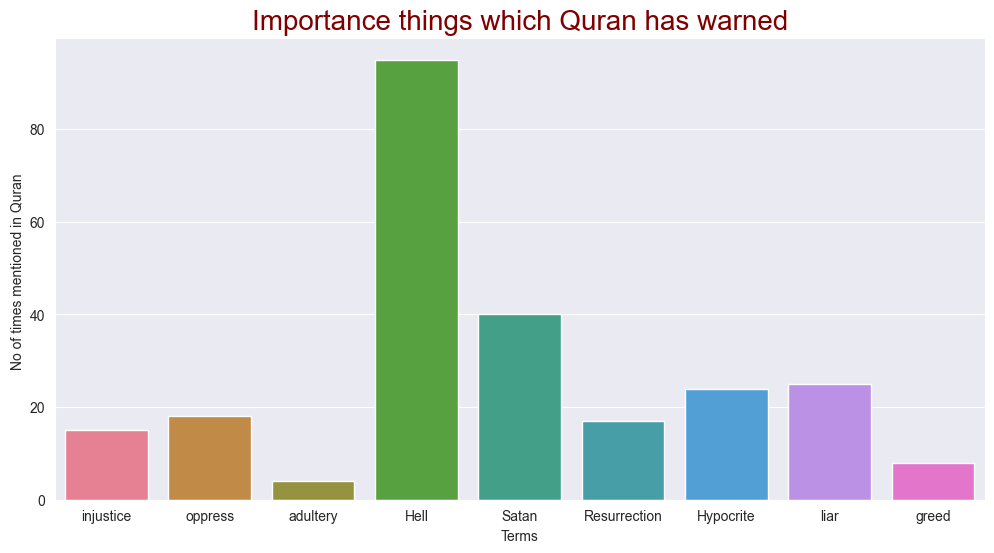

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Importance things which Quran has warned',fontdict={'fontsize':20,'color':'maroon'})
plt.xlabel('Terms')
plt.ylabel('No of times mentioned in Quran ')
ax = sns.barplot(data=terms_names_df,x='Terms',y='Frequency',palette='husl')


plt.show()

#### There are many acts and harmful deeds that Quran has condemend and warned about their consequences.

In [ ]:
# Function for generating word cloud, it takes, a string, stopwords list, title for the image, maxwords to show
def word_cloud_generator(text_corpus, stopwords, title, maxwords):
    word_cloud = WordCloud( background_color='white', stopwords=stopwords, height=1080, width=1920, max_words=maxwords)
    word_cloud.generate(text_corpus)

    plt.figure(figsize=( 12,6))
    plt.imshow(word_cloud)
    plt.title(title, fontweight='bold', fontsize=16,color='maroon')
    plt.axis('off')
    plt.show()

# Collected some stopwords from the English Quran and updating it in STOPWORDS set
quranic_stop_words = ['ye', 'verily', 'will', 'said', 'say', 'us', 'thy', 'thee', 'O', 'except', 'Nay',
                      'thou' ,'hath', 'Thus', 'none', 'therein', 'come', 'came', 'even', 'two', 'word',
                      'every', 'let', 'thing', 'with', 'whose', 'forth', 'wouldst', 'set', 'unto']
stopwords = STOPWORDS.update(quranic_stop_words)



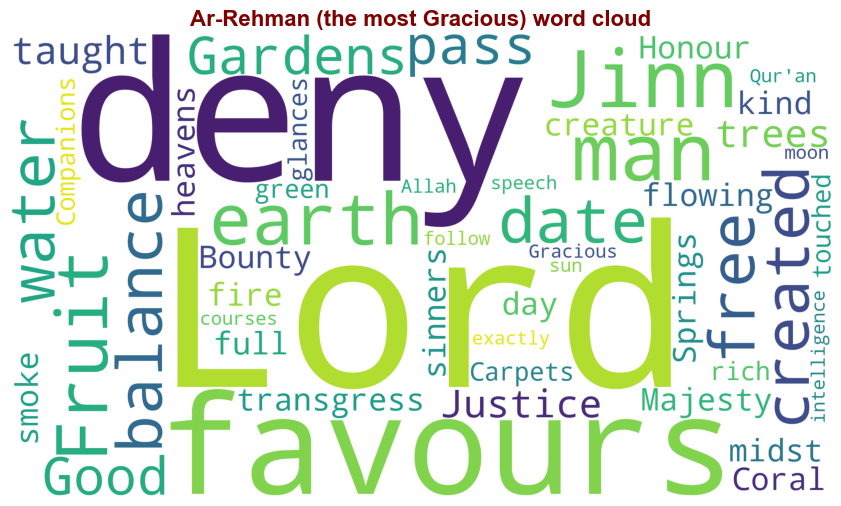

In [ ]:
surah_rehman=quran_english_with_surah[quran_english_with_surah['Surah']==55]
surah_rehman_text=''
for lab,row in surah_rehman.iterrows():
    surah_rehman_text+=row['Text']

word_cloud_generator(surah_rehman_text,stopwords,'Ar-Rehman (the most Gracious) word cloud',50)

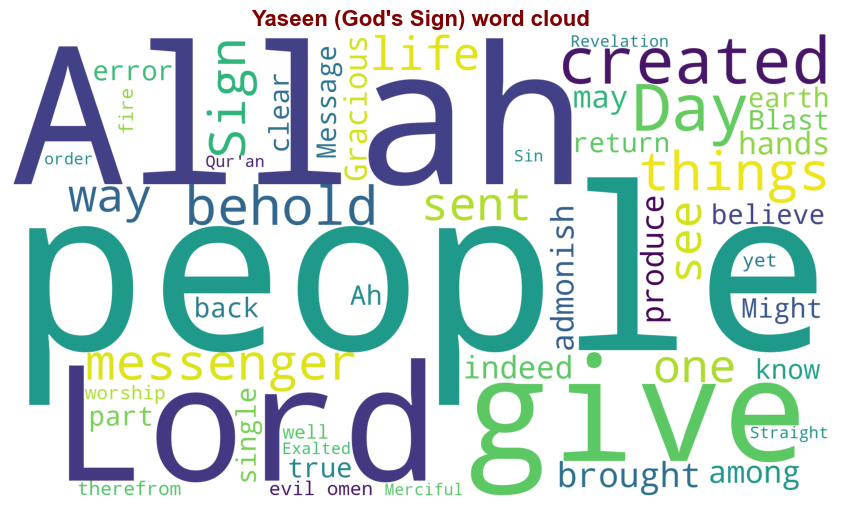

In [ ]:
surah_yaseen=quran_english_with_surah[quran_english_with_surah['Surah']==36]
surah_yaseen_text=''
for lab,row in surah_yaseen.iterrows():
    surah_yaseen_text+=row['Text']

word_cloud_generator(surah_yaseen_text,stopwords,"Yaseen (God's Sign) word cloud",50)

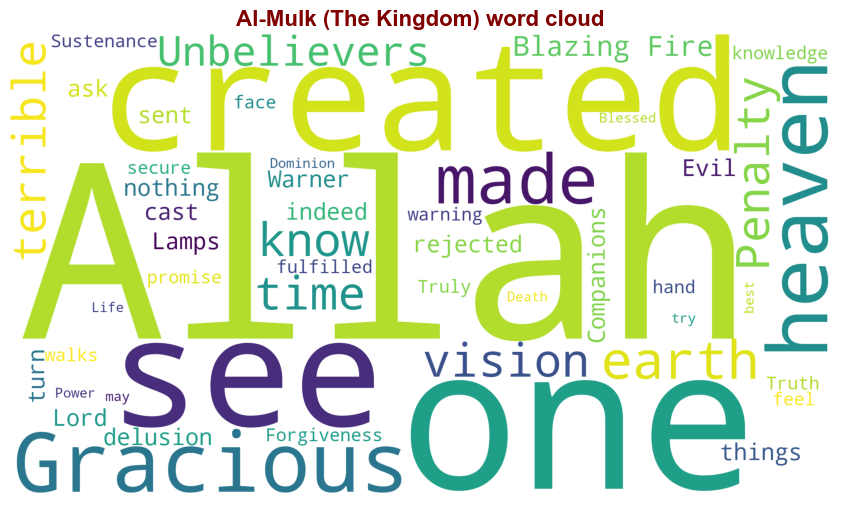

In [ ]:
surah_mulk=quran_english_with_surah[quran_english_with_surah['Surah']==67]
surah_mulk_text=''
for lab,row in surah_mulk.iterrows():
    surah_mulk_text+=row['Text']

word_cloud_generator(surah_mulk_text,stopwords,"Al-Mulk (The Kingdom) word cloud",50)